In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [2]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [3]:
X[0].shape

(784,)

In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)

data_2d = tsne.fit_transform(X)

In [15]:
data_2d[:,0]
y

array([7, 3, 8, ..., 9, 8, 1], dtype=uint8)

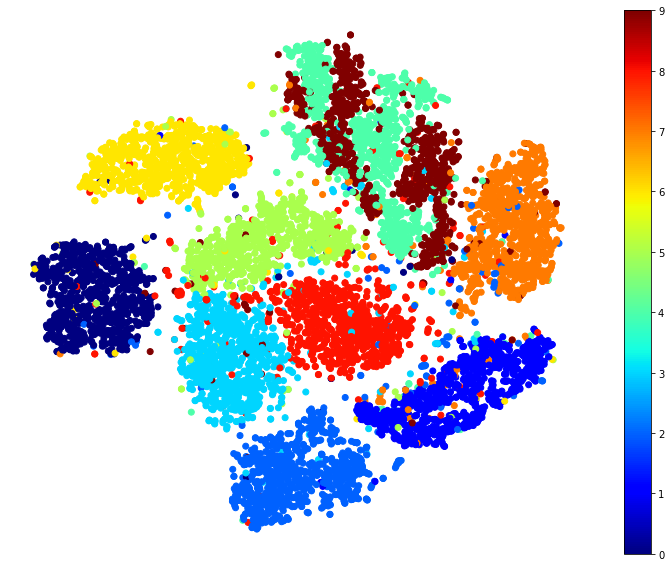

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(data_2d[:,0],data_2d[:,1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


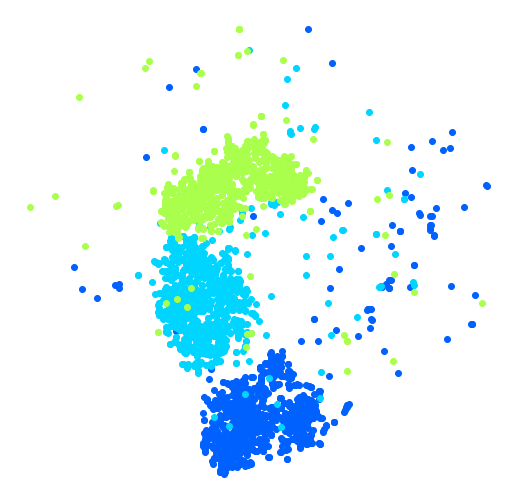

In [22]:
import matplotlib as mpl
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(data_2d[y == digit, 0], data_2d[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [23]:
data_2d[y == 2]

array([[ -0.48557913, -65.77158   ],
       [  6.1797714 , -54.472652  ],
       [ 56.00763   ,  25.813866  ],
       ...,
       [-20.190258  , -80.623215  ],
       [-20.871943  , -82.50201   ],
       [ 12.113496  , -54.91921   ]], dtype=float32)

In [24]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

In [25]:
idx

array([False,  True, False, ..., False, False, False])

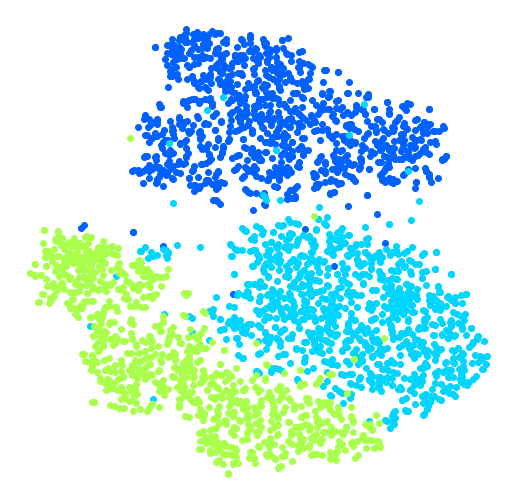

In [26]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [27]:


from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)



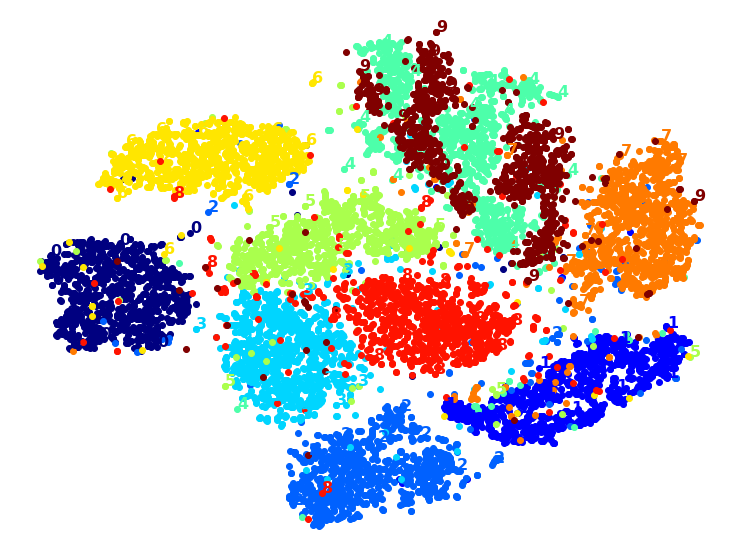

In [30]:
plot_digits(data_2d, y)

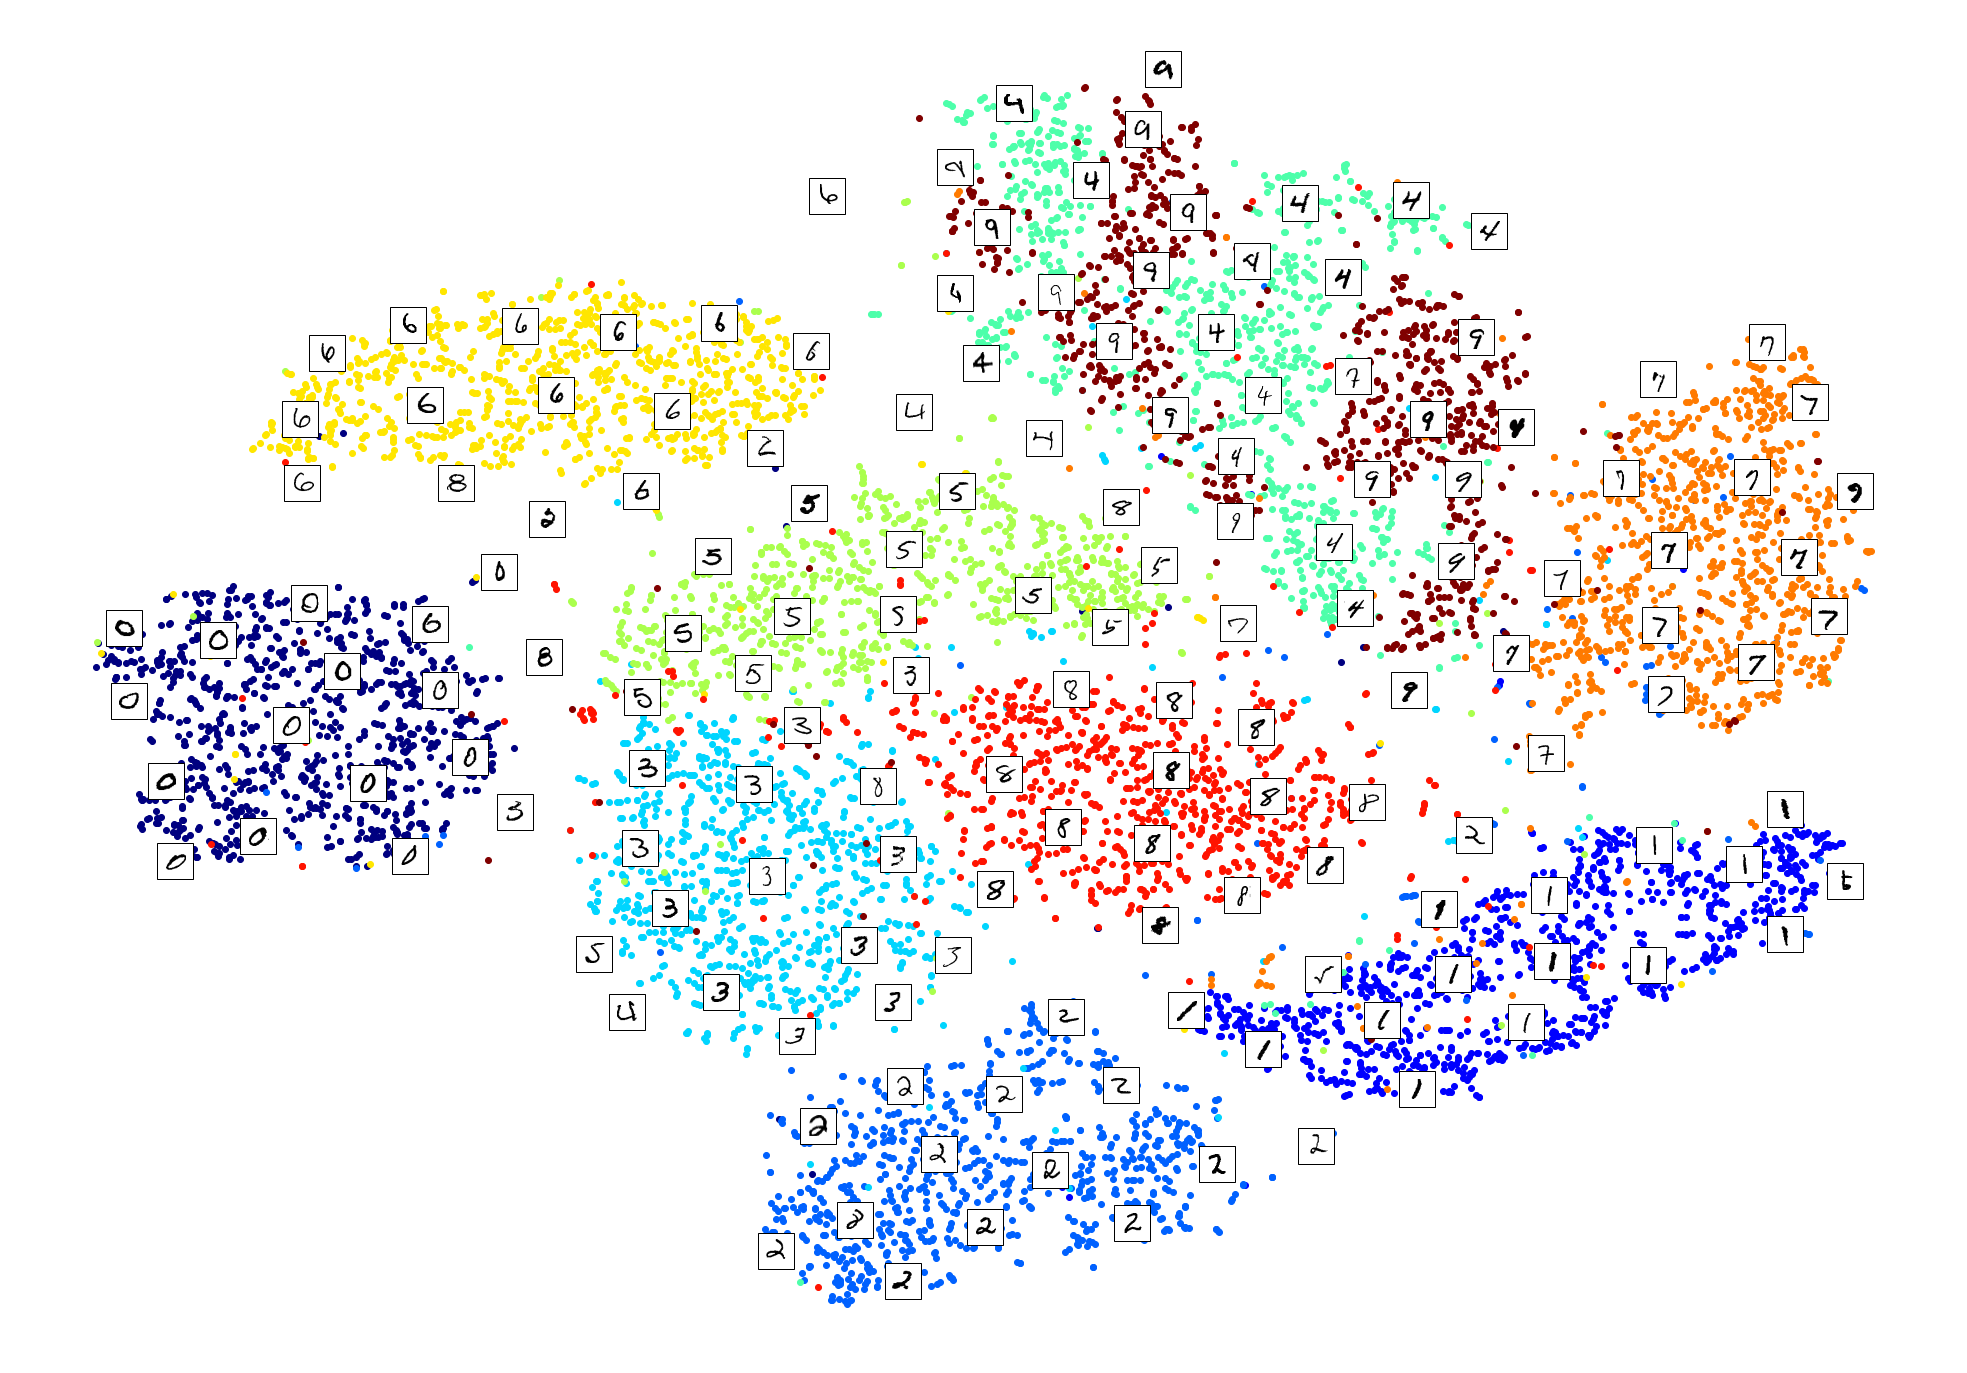

In [32]:
plot_digits(data_2d,y,images=X,figsize=(35,25))

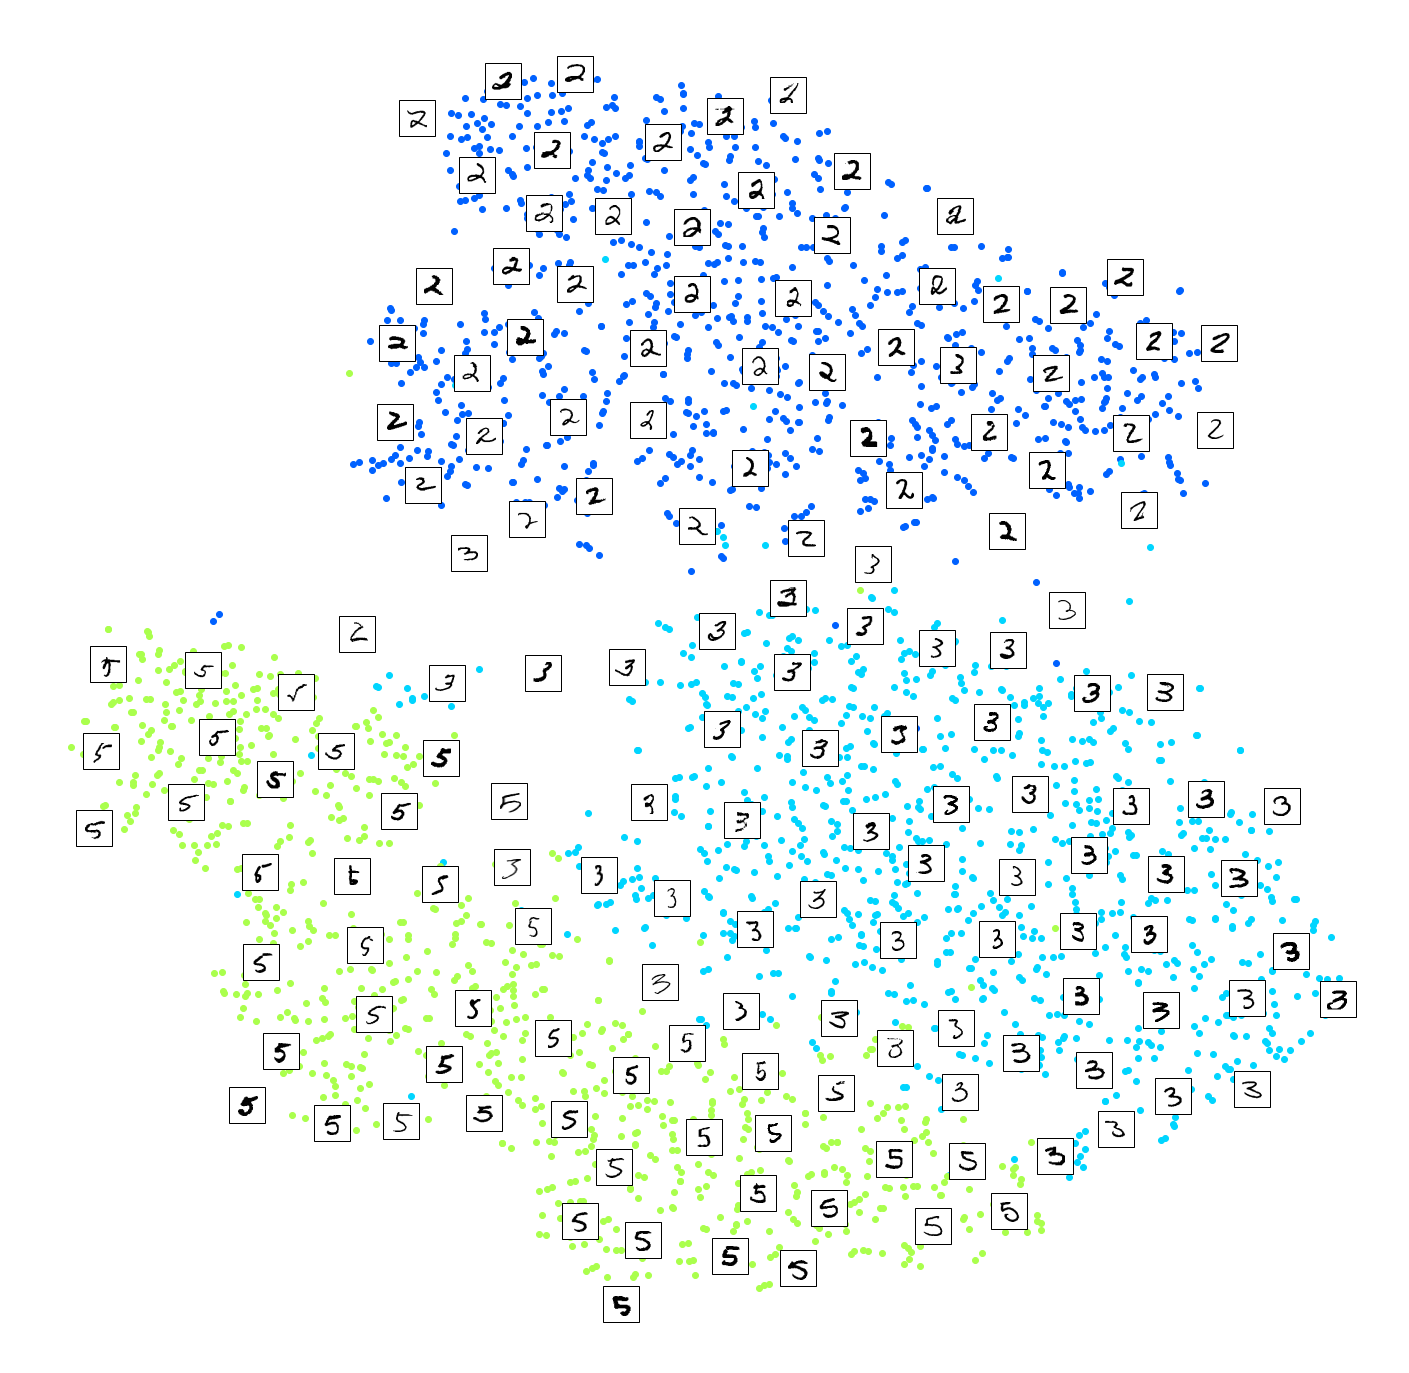

In [39]:
plot_digits(X_subset_reduced,y_subset,images=X_subset,figsize=(25,25))